In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, concatenate, Input, Flatten, Dense


import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],    label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [ ]:
np.random.seed(121)
tf.random.set_seed(121)
tf.random.shuffle(50, seed=121)

<tf.Tensor: shape=(), dtype=int32, numpy=50>

In [ ]:
d_path = '/content/drive/MyDrive/Colab Notebooks/pkg/dl_exam/'

### MNIST (28 * 28)

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


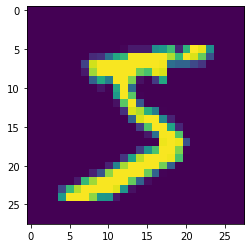

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
# X_train가 모델에 들어가게 만든다
X_train = X_train.reshape(X_train.shape[0], 784)
# X_test도 동일
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### 픽셀값은 0~255까지 >>> 스케일링필요(255으로 나눈다)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))    # 0~9까지
print(model.summary())    # param : 모델에 필요한 화살표(weight)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train,y_train,
          epochs = 100,
          batch_size=300,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.2124 - accuracy: 0.9395 - val_loss: 0.1771 - val_accuracy: 0.9479
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1613 - accuracy: 0.9532 - val_loss: 0.1448 - val_accuracy: 0.9581
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1332 - accuracy: 0.9606 - val_loss: 0.1358 - val_accuracy: 0.9590
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1152 - accuracy: 0.9655 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.1211 - val_accuracy: 0.9630
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0910 - accuracy: 0.9734 - val_loss: 0.1123 - val_accuracy: 0.9669
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.1079 - val_accuracy: 0.9669

In [ ]:
print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9731
acc: 0.9731, loss: 0.1086


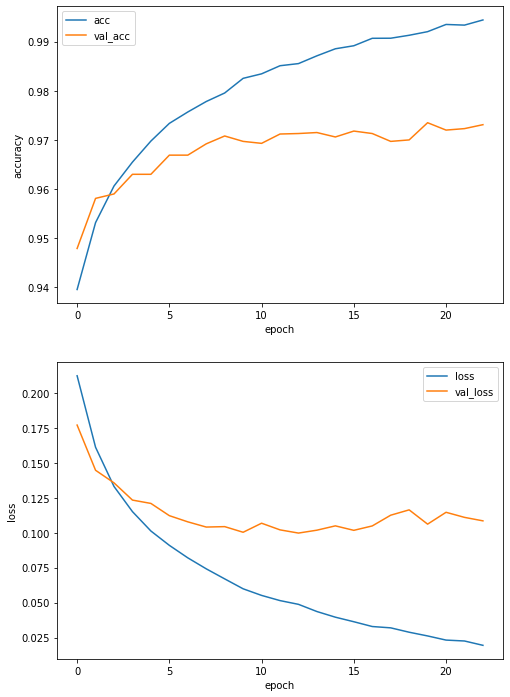

In [ ]:
CHART_PLOT_HISTORY(history)

----------------  FCNN

### MNIST CNN(input data 형태가 중요 - 넓이 높이 채널)

X_train = X_train.reshape(X_train.shape[0], 28,28,1) /255

X_test = X_test.reshape(X_test.shape[0], 28,28,1) / 255

In [16]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape, y_test[:2])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,) [7 2]


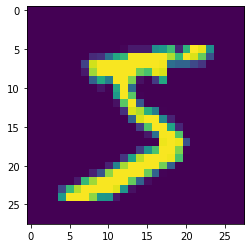

In [17]:
plt.imshow(X_train[0])
plt.show()

In [18]:
from keras.models import Sequential
# ----------------------------- FC-->CNN : Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],    label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [20]:
# X_train (60000, 28(W), 28(H), 1(Channel))
# print(X_train[0]) 0 ~255 픽셀컬러 --> 스케일링 / 255
X_train = X_train.reshape(X_train.shape[0], 28,28,1) / 255
# X_test (10000, 28, 28)  --> 10000 * 784
X_test = X_test.reshape(X_test.shape[0], 28,28,1) / 255

In [30]:
model = Sequential()

model.add(Conv2D(filters=20, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))    # 25 25 20    1 4 4 20 > 320
model.add(MaxPool2D(pool_size=(2, 2)))                                                        # 13 13 20    
model.add(BatchNormalization())

model.add(Conv2D(filters=40, kernel_size=(3,3), activation='relu'))                           # 11 11 40    20 3 3 40 > 7200
model.add(MaxPool2D(pool_size=(2, 2)))  # Active map : 6*6*40                                 # 6   6 40
model.add(BatchNormalization())

model.add(Flatten())                                                                                        # 
model.add(Dense(64, activation='relu'))                                                       # 64064
model.add(Dense(10, activation='softmax'))  # 출력결과 0~9숫자                                # 650
print(model.summary())   # total params : 72,294

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 20)        340       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 20)        80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 40)        7240      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 40)          160       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)             

In [22]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
model.compile(optimizer="adam",   # GD(경사하강) SGD momentum ada.. adam
              loss='sparse_categorical_crossentropy', # 손실함수 cost loss
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train,y_train,
          epochs = 100,
          batch_size=300,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
200/200 [==============================] - 28s 134ms/step - loss: 0.8688 - accuracy: 0.7616 - val_loss: 0.1074 - val_accuracy: 0.9694
Epoch 2/100
200/200 [==============================] - 28s 138ms/step - loss: 0.1007 - accuracy: 0.9716 - val_loss: 0.0589 - val_accuracy: 0.9818
Epoch 3/100
200/200 [==============================] - 29s 146ms/step - loss: 0.0694 - accuracy: 0.9798 - val_loss: 0.0444 - val_accuracy: 0.9858
Epoch 4/100
200/200 [==============================] - 29s 143ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0462 - val_accuracy: 0.9849
Epoch 5/100
200/200 [==============================] - 26s 129ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0434 - val_accuracy: 0.9857
Epoch 6/100
200/200 [==============================] - 26s 129ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 7/100
200/200 [==============================] - 26s 128ms/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0318 -

In [28]:
print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0349 - accuracy: 0.9917
acc: 0.9917, loss: 0.0349


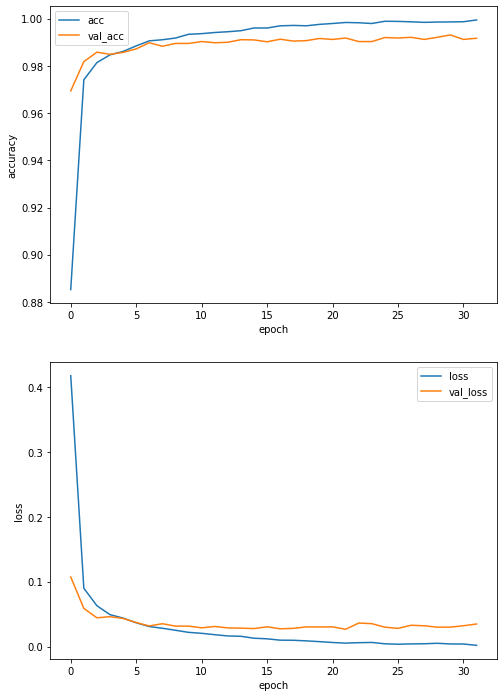

In [29]:
CHART_PLOT_HISTORY(history)